In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory('C:\\Users\\Supriya Suman\\Desktop\\4th sem Projects\\Garbage Prediction\\garbage_dataset12\\', target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 15515 images belonging to 12 classes.


In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

In [4]:
for layer in vgg16.layers:
  layer.trainable = False

In [5]:
from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [6]:
prediction = layers.Dense(units = 12, activation="softmax")(x)
model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
result = model.fit(train_data, epochs=28, steps_per_epoch=len(train_data))

Epoch 1/28
485/485 [==============================] - 2909s 6s/step - loss: 1.2936 - accuracy: 0.6130
Epoch 2/28
485/485 [==============================] - 3574s 7s/step - loss: 0.9598 - accuracy: 0.7047
Epoch 3/28
485/485 [==============================] - 2404s 5s/step - loss: 0.8751 - accuracy: 0.7310
Epoch 4/28
485/485 [==============================] - 2916s 6s/step - loss: 0.8080 - accuracy: 0.7530
Epoch 5/28
485/485 [==============================] - 3343s 7s/step - loss: 0.7506 - accuracy: 0.7634
Epoch 6/28
485/485 [==============================] - 6319s 13s/step - loss: 0.7237 - accuracy: 0.7745
Epoch 7/28
485/485 [==============================] - 5561s 11s/step - loss: 0.6934 - accuracy: 0.7815
Epoch 8/28
485/485 [==============================] - 7182s 15s/step - loss: 0.6788 - accuracy: 0.7897
Epoch 9/28
485/485 [==============================] - 3069s 6s/step - loss: 0.6680 - accuracy: 0.7943
Epoch 10/28
485/485 [==============================] - 2496s 5s/step - loss: 0.

In [8]:
from tensorflow.keras.preprocessing import image
output_class = ["battery", "biological", "brown-glass", "cardboard", "clothes", "green-glass", "metal", "paper", "plastic", "shoes", "trash", "white-glass"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)
  print("Your waste material is",predicted_value, "with", predicted_accuracy,"% accuracy.")


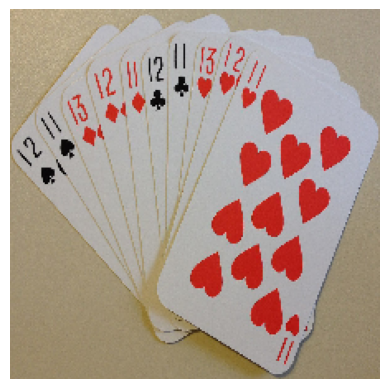

1/1 [==============================] - 1s 532ms/step
Your waste material is cardboard with 100.0 % accuracy.


In [9]:
waste_prediction("uploads/card.jpg")

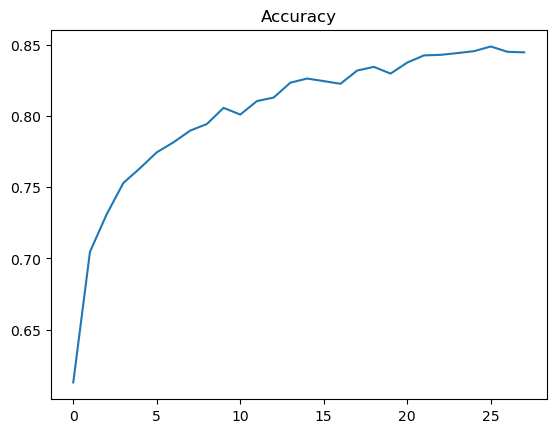

In [10]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

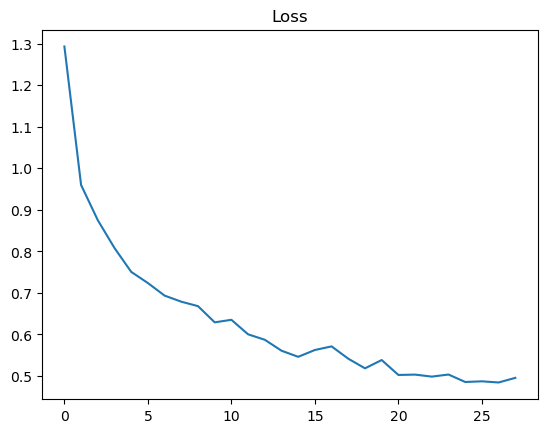

In [11]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()

In [12]:
model.save("predictWaste12.h5")